In [53]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf
from pandas.plotting import autocorrelation_plot
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

In [54]:
df = pd.read_csv('datasets/IBM (1).csv')
df.set_index('Date', inplace=True)
series = pd.Series(df['Close'])

<Axes: xlabel='Date'>

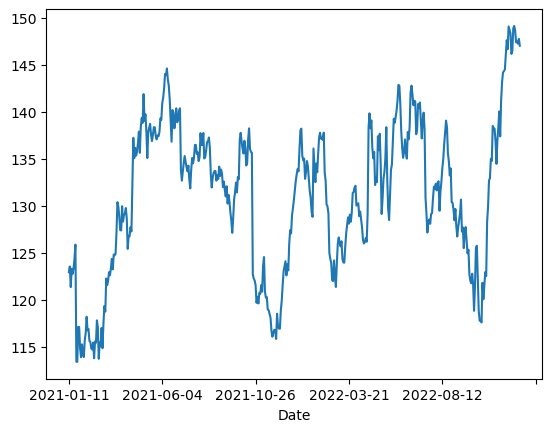

In [55]:
series.plot()

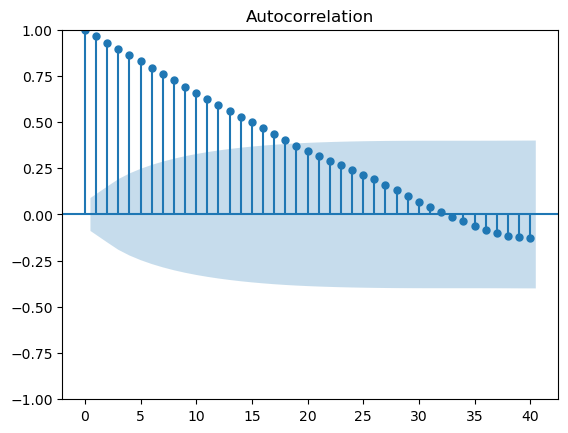

In [56]:
fig = plot_acf(series, lags=40)

In [57]:
sm.stats.acorr_ljungbox(series, lags=10, return_df=True)

,lb_stat,lb_pvalue
1,454.207577,8.758701e-101
2,875.447986,7.922921e-191
3,1267.522397,1.639716e-274
4,1631.307360,0.000000e+00
5,1968.248803,0.000000e+00
6,2278.857376,0.000000e+00
7,2565.256762,0.000000e+00
8,2826.385666,0.000000e+00
9,3062.408383,0.000000e+00
10,3276.095045,0.000000e+00


In [58]:
result = adfuller(series)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -2.5140069560414946
p-value: 0.11210337105654711


In [59]:
differenced_series = series.diff().dropna()

<Axes: xlabel='Date'>

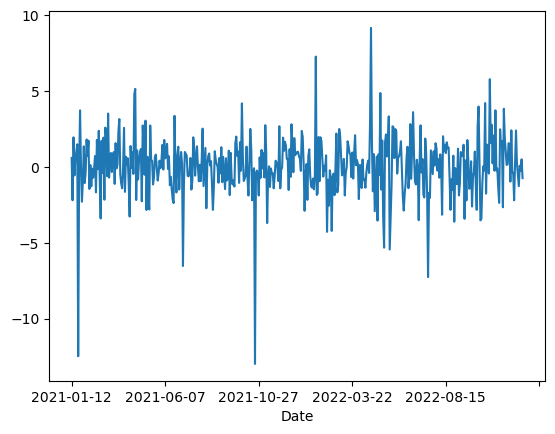

In [60]:
differenced_series.plot()

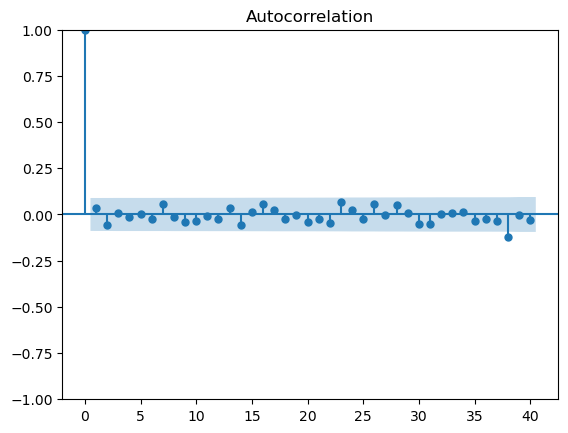

In [61]:
fig2 = plot_acf(differenced_series, lags=40)

In [62]:
sm.stats.acorr_ljungbox(differenced_series, lags=10, return_df=True)

,lb_stat,lb_pvalue
1,0.666444,0.414294
2,2.281266,0.319617
3,2.315470,0.509564
4,2.382475,0.665797
5,2.383116,0.793986
6,2.708206,0.844477
7,4.252781,0.750245
8,4.318079,0.827346
9,5.081019,0.827189
10,5.633012,0.845096


In [63]:
result = adfuller(differenced_series)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -21.110042686893784
p-value: 0.0
